# Stock Price Prediction

**Yêu cầu:**

* Sử dụng dữ liệu được cung cấp trong email này (dữ liệu giá và khối lượng của một vài mã cổ phiếu) để xây dựng một số mô hình dự đoán biến động giá cổ phiếu.

**Biến động giá cổ phiếu:**

* Biến động giá cổ phiếu được định nghĩa là sự thay đổi của giá cổ phiếu N (phút hoặc giờ hoặc ngày) sau so với giá cổ phiếu hiện tại, được tính bằng công thức:
Trong phân tích này, N = 7 (ngày)

$$ \text{Biến động giá cổ phiếu} = \text{Giá cổ phiếu tại thời điểm } (t + N) - \text{Giá cổ phiếu tại thời điểm } t $$

**Dữ liệu:**

* Dữ liệu được cung cấp gồm giá và khối lượng giao dịch của 4 mã cổ phiếu sau: `PNJ`, `VIC`, `MSN`, `FPT`

**Mục tiêu: Chúng ta sẽ tiến hành tìm hiểu qua Open, High, Low, Close là gì ? Và tại sao trong dự án này lại dùng giá Close để dự đoán giá cổ phiếu ?**


* Open (Giá mở cửa): Giá của cổ phiếu tại thời điểm bắt đầu phiên giao dịch trong ngày.
* High (Giá cao nhất): Giá cao nhất mà cổ phiếu đạt được trong suốt phiên giao dịch của ngày.
* Low (Giá thấp nhất): Giá thấp nhất mà cổ phiếu đạt được trong suốt phiên giao dịch của ngày.
* Close (Giá đóng cửa): Giá của cổ phiếu tại thời điểm kết thúc phiên giao dịch trong ngày.
* Độ ổn định và đại diện tốt: Giá đóng cửa được xem là đại diện tốt nhất cho giá trị thực tế của cổ phiếu trong một ngày giao dịch. Nó phản ánh mức giá mà người mua và người bán cuối cùng đã chốt lại, do đó mang tính chất ổn định và đáng tin cậy hơn so với giá mở cửa, giá cao nhất hoặc giá thấp nhất.
* Sự sẵn có của dữ liệu: Dữ liệu về giá đóng cửa thường dễ thu thập và phổ biến hơn trong các cơ sở dữ liệu tài chính. Điều này giúp việc xây dựng mô hình dự đoán trở nên thuận tiện hơn.
* Tính chất phản ánh tâm lý thị trường: Giá đóng cửa phản ánh tâm lý cuối cùng của thị trường trong ngày, giúp các nhà đầu tư và nhà phân tích hiểu rõ hơn về xu hướng của cổ phiếu trong ngắn hạn và dài hạn.
* Giảm thiểu nhiễu: So với giá mở cửa, giá cao nhất và giá thấp nhất, giá đóng cửa ít bị ảnh hưởng bởi các biến động ngắn hạn và những sự kiện bất ngờ trong ngày giao dịch. Điều này giúp giảm thiểu nhiễu và cung cấp dữ liệu ổn định hơn cho các mô hình dự đoán.
Xây dựng các mô hình dự đoán biến động giá cổ phiếu cho các mã cổ phiếu trên, bao gồm việc sử dụng các kỹ thuật phân tích và dự đoán để xác định các yếu tố ảnh hưởng và dự đoán chính xác sự biến động của giá cổ phiếu.


## Libraries and Settings
Đầu tiên, chúng ta import các thư viện cần thiết

In [ ]:
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox
import joblib
import warnings



# Settings for plots
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

##Loading the Data
Chúng ta tải các tập dữ liệu cho từng công ty và hiển thị shape của chúng cũng như bản xem trước của một số hàng đầu tiên của dữ liệu.

In [ ]:
# Load the datasets
pnj = pd.read_csv('PNJ.csv')
vic = pd.read_csv('VIC.csv')
msn = pd.read_csv('MSN.csv')
fpt = pd.read_csv('FPT.csv')


# Print the shape of each dataset
print("Shape of PNJ dataset:", pnj.shape)
print("Shape of VIC dataset:", vic.shape)
print("Shape of MSN dataset:", msn.shape)
print("Shape of FPT dataset:", fpt.shape)

Shape of PNJ dataset: (125309, 8)
Shape of VIC dataset: (101266, 8)
Shape of MSN dataset: (135354, 8)
Shape of FPT dataset: (97406, 8)


In [ ]:
# Print preview of each dataset
print("Preview of PNJ dataset:")
print(pnj.head())

print("\nPreview of VIC dataset:")
print(vic.head())

print("\nPreview of MSN dataset:")
print(msn.head())

print("\nPreview of FPT dataset:")
print(fpt.head())

Preview of PNJ dataset:
  Ticker       Date/Time   Open   High    Low  Close  Volume  Open Interest
0    PNJ  2/28/2018 9:15  78.14  78.99  78.14  78.99     270              0
1    PNJ  2/28/2018 9:16  78.94  78.94  78.94  78.94      10              0
2    PNJ  2/28/2018 9:19  78.14  78.14  78.14  78.14     283              0
3    PNJ  2/28/2018 9:20  78.14  78.14  78.14  78.14     480              0
4    PNJ  2/28/2018 9:21  78.14  78.14  78.14  78.14     146              0

Preview of VIC dataset:
  Ticker        Date/Time  Open  High   Low  Close  Volume  Open Interest
0    VIC  10/17/2018 9:39  98.5  98.5  98.5   98.5     390              0
1    VIC  10/17/2018 9:40  98.5  98.5  98.5   98.5     760              0
2    VIC  10/17/2018 9:41  98.6  98.6  98.6   98.6    2060              0
3    VIC  10/17/2018 9:42  98.6  98.6  98.6   98.6    5540              0
4    VIC  10/17/2018 9:43  98.6  98.7  98.6   98.7     760              0

Preview of MSN dataset:
  Ticker        Date/Time 

## Combining and Preprocessing Data
Chúng ta kết hợp các dataset, chuyển đổi cột ngày sang định dạng datetime và tạo một cột mới để lưu trữ ngày. Chúng ta cũng đặt cột 'Date/Time' làm chỉ mục và bỏ cột 'Open Interest'.

In [ ]:
# Combine the datasets
data = pd.concat([pnj, vic, msn, fpt])
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Extract 'Day' from 'Date/Time'
data['Day'] = data['Date/Time'].dt.date


# Set 'Date/Time' as the index
data.set_index('Date/Time', inplace=True)

# Drop the 'Open Interest' column if it exists
if 'Open Interest' in data.columns:
    data.drop(columns=['Open Interest'], inplace=True)


### Splitting Data Based on COVID-19 Impact
Đại dịch COVID-19 bắt đầu ảnh hưởng đáng kể đến Việt Nam vào khoảng tháng 1 năm 2020, là một sự kiện lịch sử lớn có tác động sâu sắc đến thị trường tài chính. Đại dịch đã gây ra những gián đoạn kinh tế chưa từng có, dẫn đến biến động và biến động đáng kể về giá cổ phiếu. Do ảnh hưởng đáng kể của COVID-19 đối với hành vi thị trường, điều quan trọng là phải phân tích riêng các giai đoạn trước đại dịch và trong đại dịch để đảm bảo những hiểu biết chính xác và có ý nghĩa hơn.

In [ ]:
# Define the split date
split_date = pd.to_datetime('2020-01-23')

# Split the data into pre-COVID and during-COVID datasets
pre_covid_data = data[data.index < split_date]
during_covid_data = data[data.index >= split_date]


print("Pre-COVID Data Shape:", pre_covid_data.shape)
print("During-COVID Data Shape:", during_covid_data.shape)

Pre-COVID Data Shape: (269763, 7)
During-COVID Data Shape: (189572, 7)


## Descriptive Statistics
Chúng ta hiển thị số liệu thống kê mô tả và thông tin cho các bộ dữ liệu.

In [ ]:
print(pnj.describe())
print(vic.describe())
print(msn.describe())
print(fpt.describe())

                Open           High            Low          Close  \
count  125309.000000  125309.000000  125309.000000  125309.000000   
mean       72.182052      72.372590      72.042287      72.179371   
std         9.900263       9.995786       9.830847       9.899401   
min        44.430000      44.530000      44.040000      44.140000   
25%        64.600000      64.700000      64.570000      64.600000   
50%        72.800000      73.010000      72.640000      72.830000   
75%        80.160000      80.350000      80.060000      80.160000   
max       100.160000     100.160000     100.160000     100.160000   

              Volume  Open Interest  
count  125309.000000       125309.0  
mean     3031.830451            0.0  
std      7248.952968            0.0  
min         1.000000            0.0  
25%       220.000000            0.0  
50%      1000.000000            0.0  
75%      3130.000000            0.0  
max    580730.000000            0.0  
                Open           High 

In [ ]:
pnj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125309 entries, 0 to 125308
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         125309 non-null  object 
 1   Date/Time      125309 non-null  object 
 2   Open           125309 non-null  float64
 3   High           125309 non-null  float64
 4   Low            125309 non-null  float64
 5   Close          125309 non-null  float64
 6   Volume         125309 non-null  int64  
 7   Open Interest  125309 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 7.6+ MB


## Data Visualization
### Average Yearly Closing Price
Chúng ta xác định một hàm để vẽ giá đóng cửa trung bình hàng ngày cho mỗi cổ phiếu.


In [ ]:
# Function to plot average daily closing price
def plot_average_day_close(ticker):
    ticker_data = data[data['Ticker'] == ticker]
    average_day_close = ticker_data.groupby('Day')['Close'].mean()
    plt.plot(pd.to_datetime(average_day_close.index), average_day_close.values, label=ticker)

### Sales Volume
Chúng ta xác định một hàm để vẽ khối lượng (Volume) cho mỗi cổ phiếu.

In [ ]:
# Function to plot day sales volume
def plot_day_volume(ticker):
    ticker_data = data[data['Ticker'] == ticker]
    sale_volume_day = ticker_data.groupby('Day')['Volume'].sum()
    plt.plot(pd.to_datetime(sale_volume_day.index), sale_volume_day.values, label=ticker)

### Moving Averages
Chúng ta tính toán và vẽ đường trung bình động cho các kích thước cửa sổ khác nhau.

In [ ]:
# Function to calculate Moving Average prices for multiple time window sizes
def calculate_multiple_moving_averages_by_time(ticker, window_sizes):
    ticker_data = data[data['Ticker'] == ticker]
    close_prices = ticker_data['Close']
    moving_averages = {}

    for window in window_sizes:
        moving_averages[f'MA_{window}_Days'] = close_prices.rolling(window=f'{window}D').mean()

    return pd.DataFrame(moving_averages)

# Function to plot stock prices and Moving Averages
def plot_stock_prices_with_ma_offset(ticker, window_sizes, offset_factor=0.02):
    moving_averages_by_time_df = calculate_multiple_moving_averages_by_time(ticker, window_sizes)

    ticker_data = data[data['Ticker'] == ticker]
    close_prices = ticker_data['Close']
    dates = ticker_data.index

    plt.figure(figsize=(14, 7))

    # Plot stock prices
    plt.plot(dates, close_prices, label='Close Price', color='blue', alpha=0.7)  # Set alpha for transparency

    # Plot Moving Averages for each window size
    colors = ['orange', 'green', 'red']  # Different colors for each Moving Average
    for i, window in enumerate(window_sizes):
        ma_column = f'MA_{window}_Days'
        ma = moving_averages_by_time_df[ma_column]
        plt.plot(dates, ma , label=f'MA {window} Days', linestyle='-', color=colors[i])

    plt.title(f"Stock Prices and Moving Averages for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()


### Plotting Average Day Prices
Chúng tôi vẽ đồ thị giá đóng cửa trung bình cho tất cả các mã.

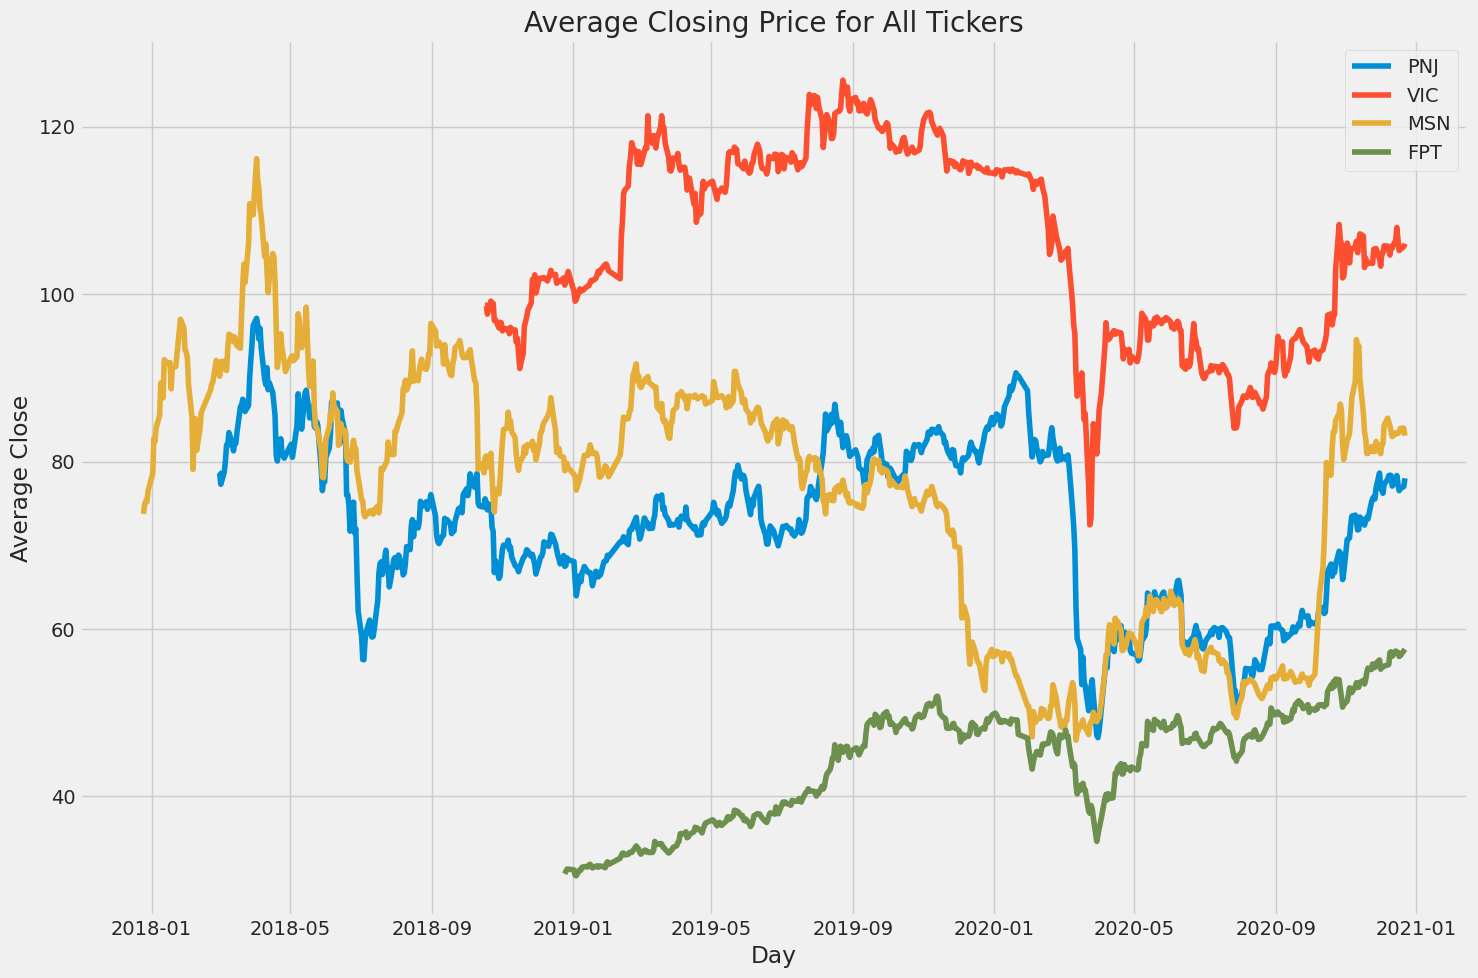

In [ ]:
# Plot average daily prices for all tickers
plt.figure(figsize=(15, 10))
for ticker in ['PNJ', 'VIC', 'MSN', 'FPT']:
    plot_average_day_close(ticker)
plt.ylabel('Average Close')
plt.xlabel('Day')
plt.title("Average Closing Price for All Tickers")
plt.legend()
plt.tight_layout()
plt.show()

### Plotting Sales Volume
Chúng ta vẽ khối lượng cho tất cả các mã cổ phiếu.


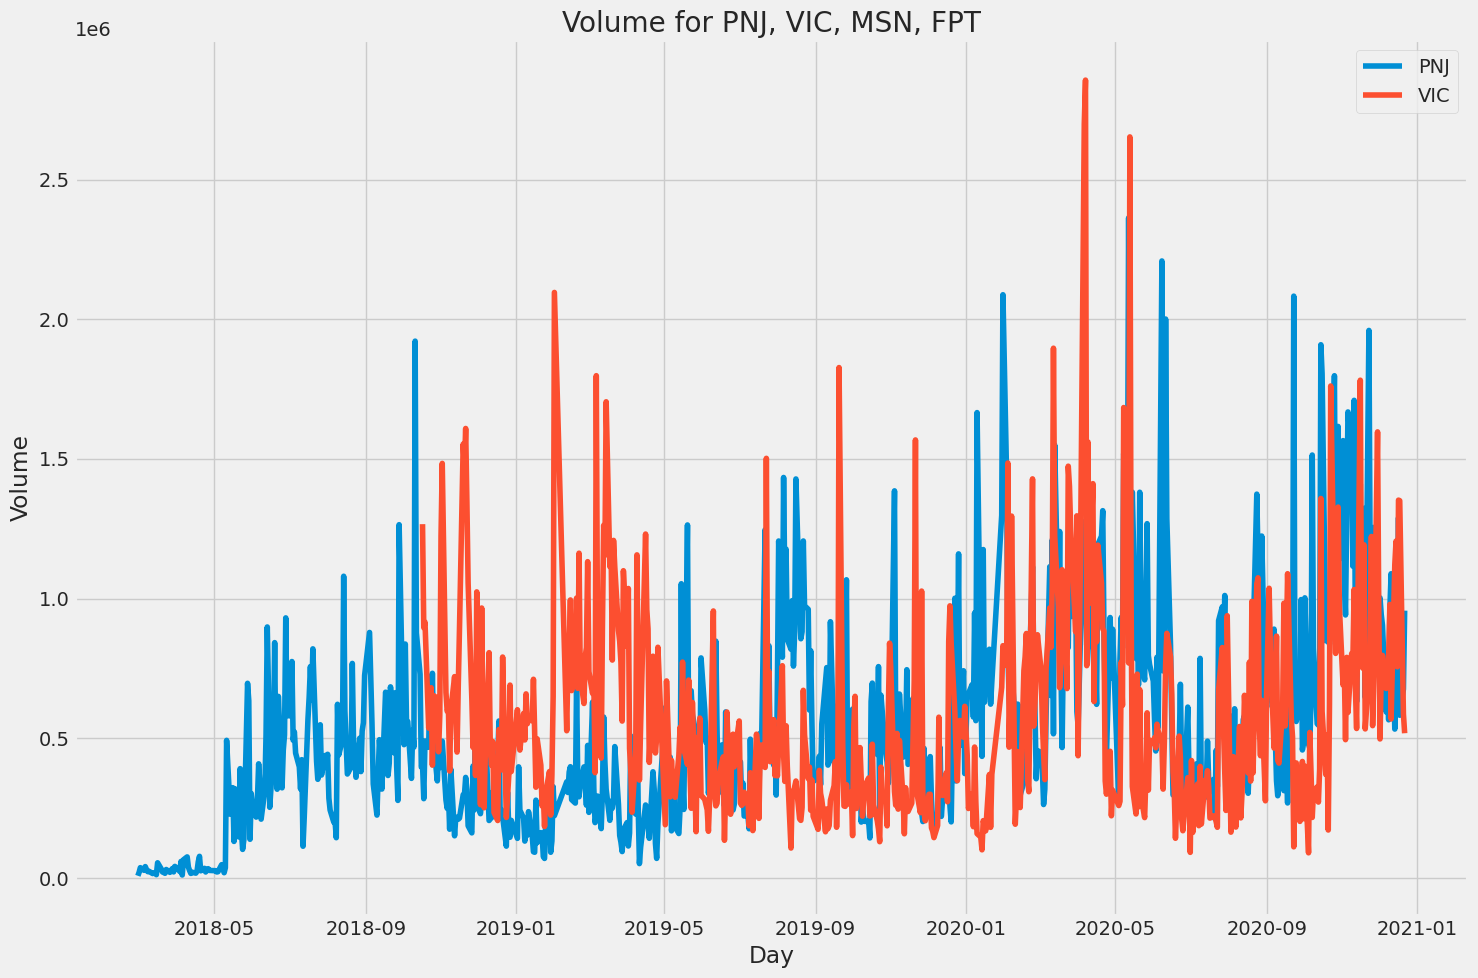

In [ ]:
# Plot average day prices for all tickers
plt.figure(figsize=(15, 10))
for ticker in ['PNJ', 'VIC']:
    plot_day_volume(ticker)
plt.ylabel('Volume')
plt.xlabel('Day')
plt.title("Volume for PNJ, VIC, MSN, FPT")
plt.legend()
plt.tight_layout()
plt.show()

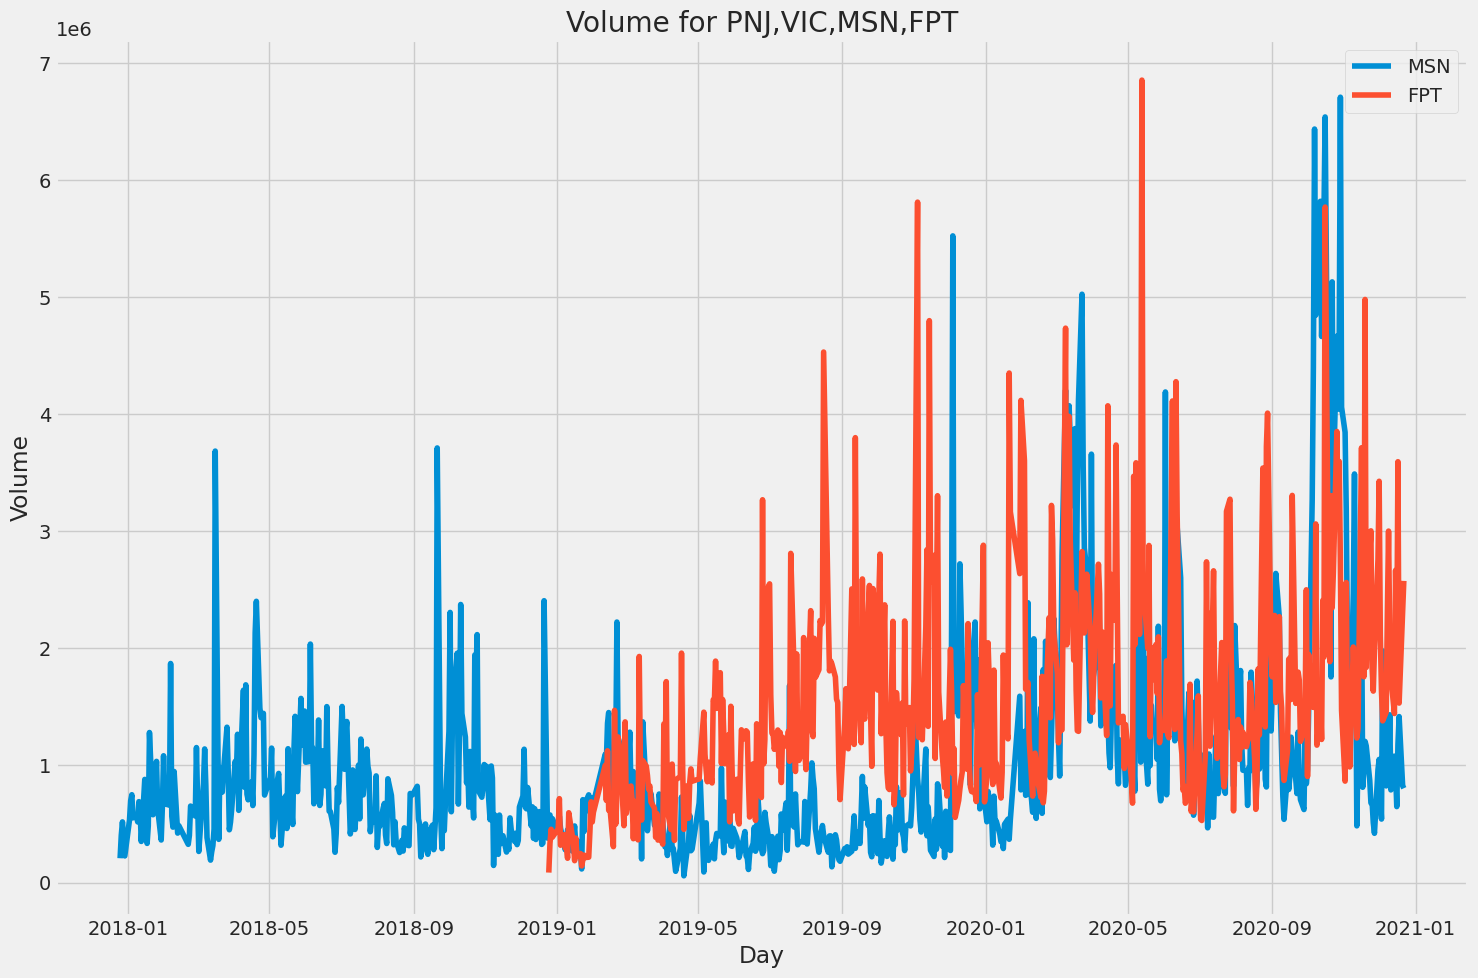

In [ ]:
# Plot average day prices for all tickers
plt.figure(figsize=(15, 10))

# Plot day sales volume for all tickers
for ticker in ['MSN', 'FPT']:
    plot_day_volume(ticker)
plt.ylabel('Volume')
plt.xlabel('Day')
plt.title("Volume for PNJ,VIC,MSN,FPT")
plt.legend()
plt.tight_layout()
plt.show()

### Plotting Stock Prices and Moving Averages
Chúng ta vẽ đồ thị giá cổ phiếu và đường trung bình động cho mỗi mã.

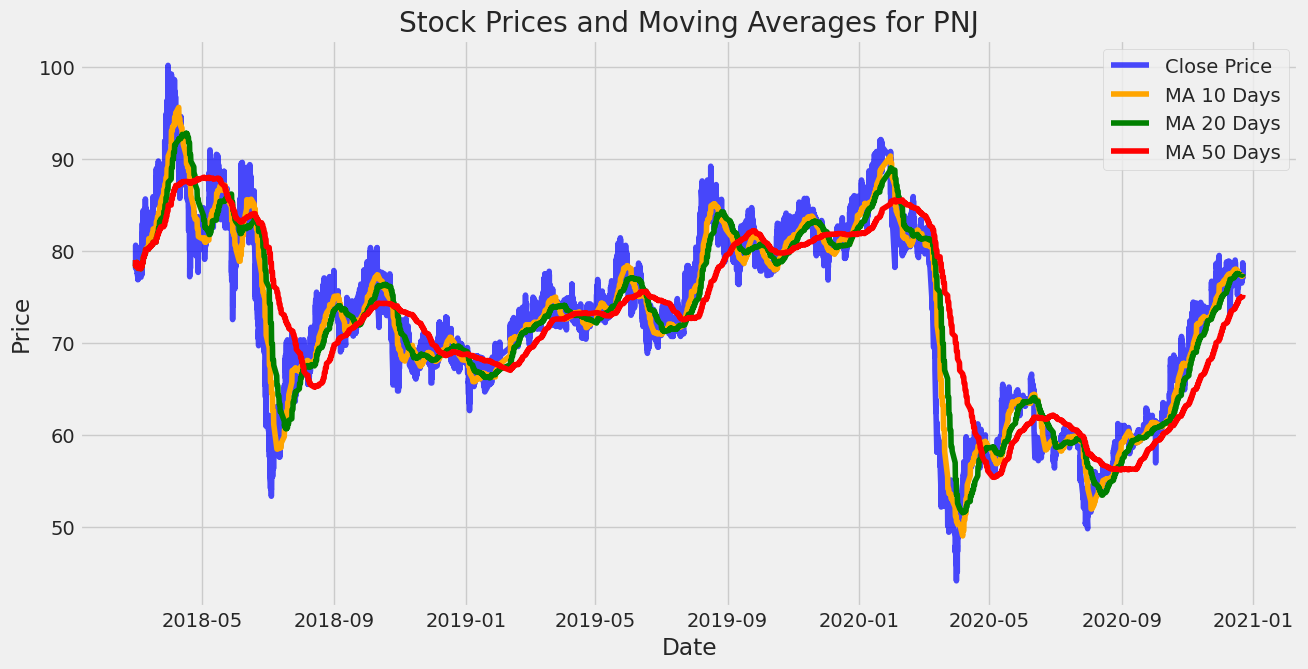

In [ ]:
# Plot stock prices and Moving Averages
plot_stock_prices_with_ma_offset('PNJ', [10, 20, 50])


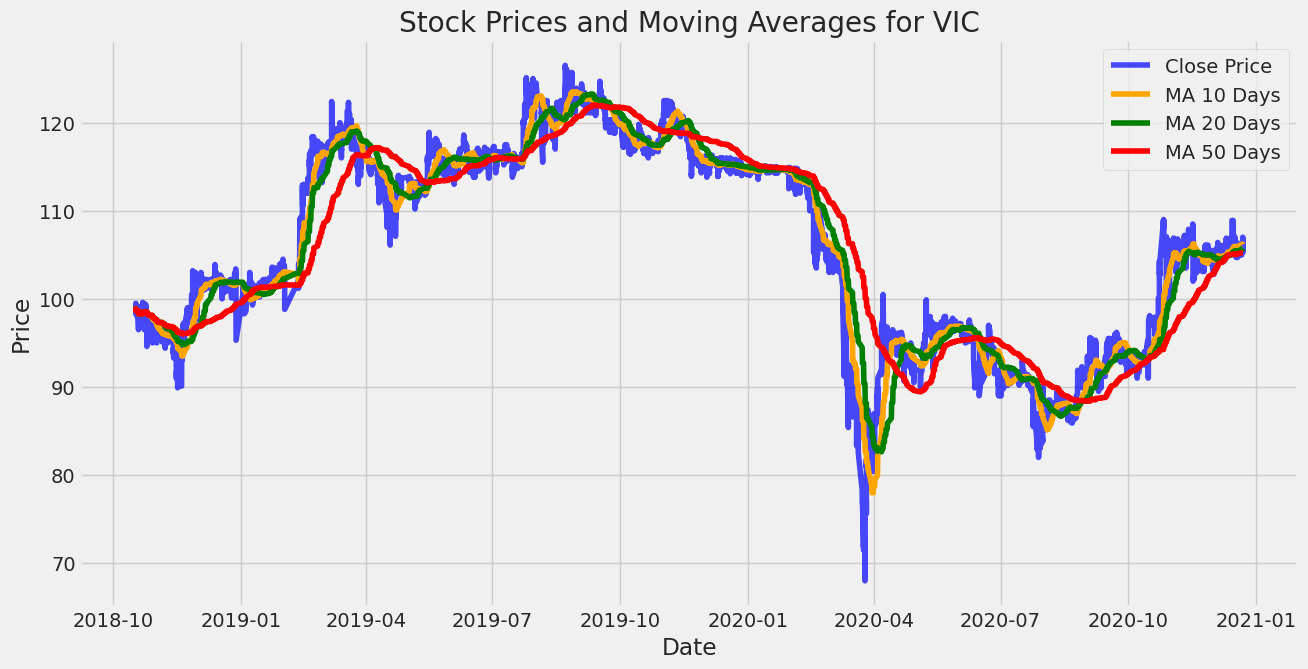

In [ ]:
# Plot stock prices and Moving Averages
plot_stock_prices_with_ma_offset('VIC', [10, 20, 50])

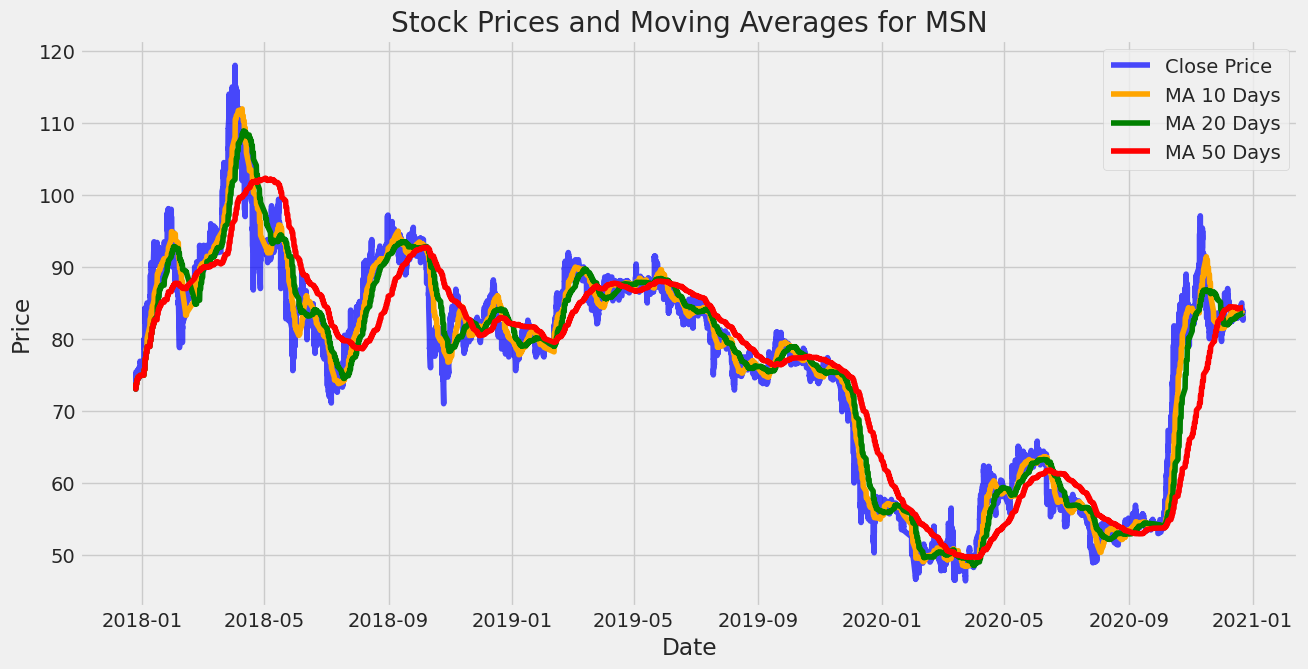

In [ ]:
# Plot stock prices and Moving Averages
plot_stock_prices_with_ma_offset('MSN', [10, 20, 50])

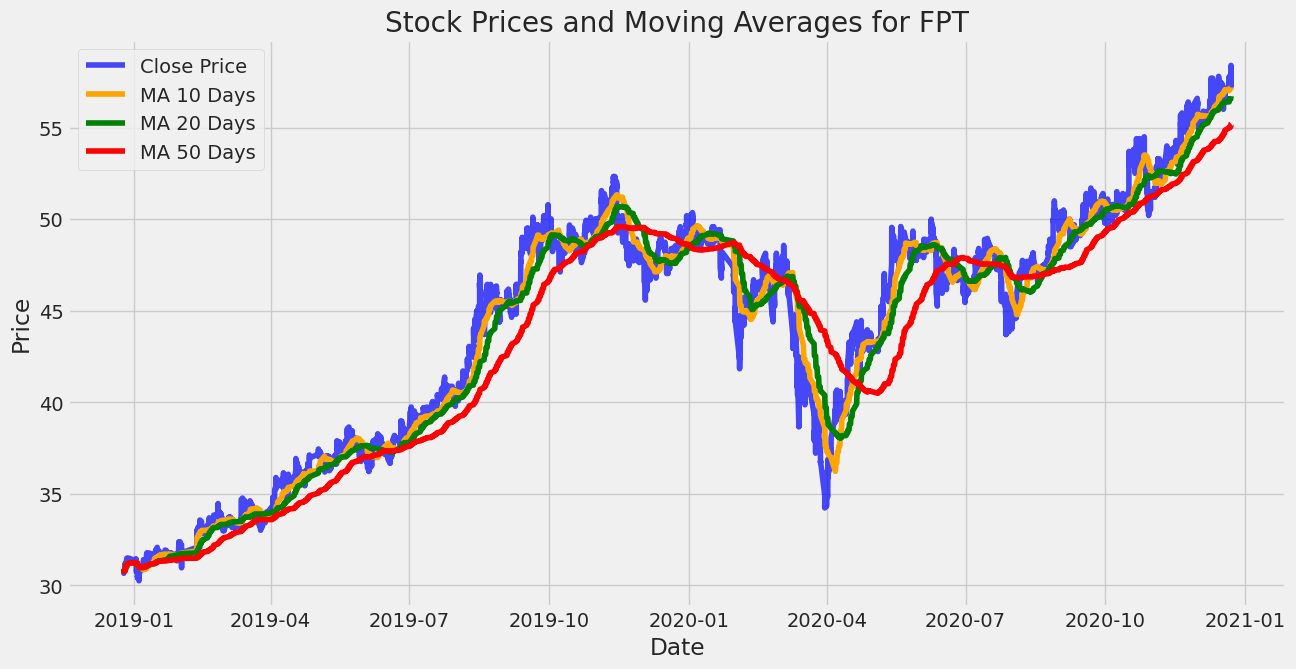

In [ ]:
# Plot stock prices and Moving Averages
plot_stock_prices_with_ma_offset('FPT', [10, 20, 50])

### Calculating and Plotting Daily Returns
#### Daily Return Calculation
Chúng ta xác định một hàm để tính lợi nhuận hàng ngày cho mỗi mã cổ phiếu và vẽ kết quả.

In [ ]:
# Function to calculate daily return for a ticker
def calculate_daily_return(ticker):
    ticker_data = data[data['Ticker'] == ticker]
    daily_return = ticker_data['Close'].pct_change()
    return daily_return

# Calculate daily return for each ticker
for ticker in ['PNJ', 'VIC', 'MSN', 'FPT']:
    data[ticker + '_Daily_Return'] = calculate_daily_return(ticker)




### Plotting Daily Returns
Chúng ta vẽ tỷ lệ phần trăm lợi nhuận hàng ngày cho mỗi mã.

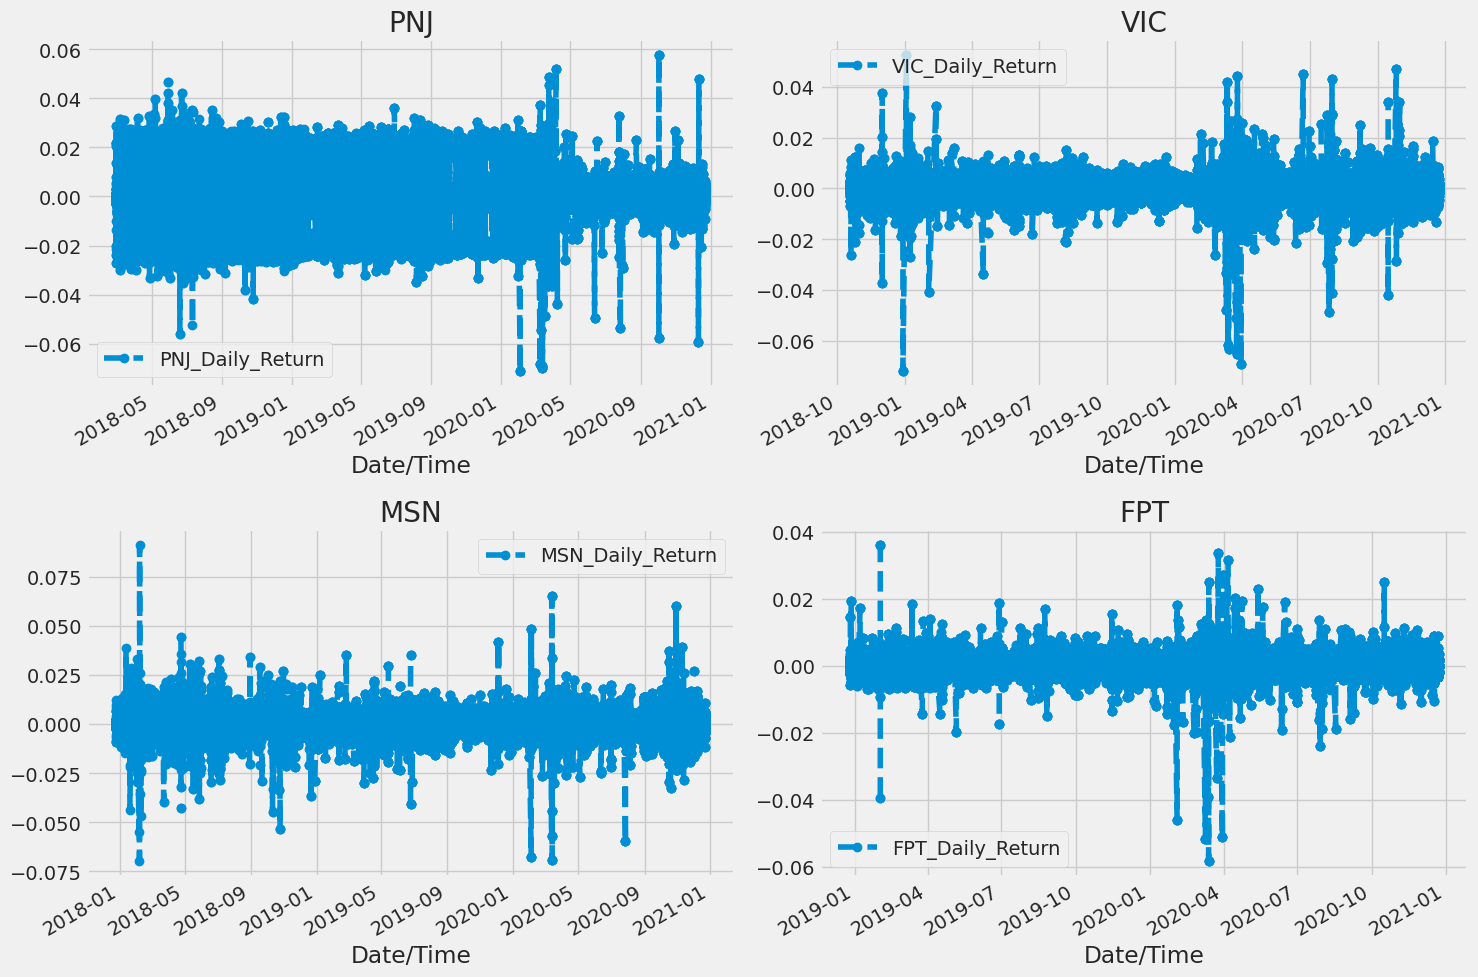

In [ ]:
# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, ticker in enumerate(['PNJ', 'VIC', 'MSN', 'FPT']):
    data[ticker + '_Daily_Return'].plot(ax=axes[i//2, i%2], legend=True, linestyle='--', marker='o')
    axes[i//2, i%2].set_title(ticker)

fig.tight_layout()
plt.show()

### Plotting Daily Return Histogram
Chúng ta vẽ biểu đồ lợi nhuận hàng ngày cho mỗi mã.

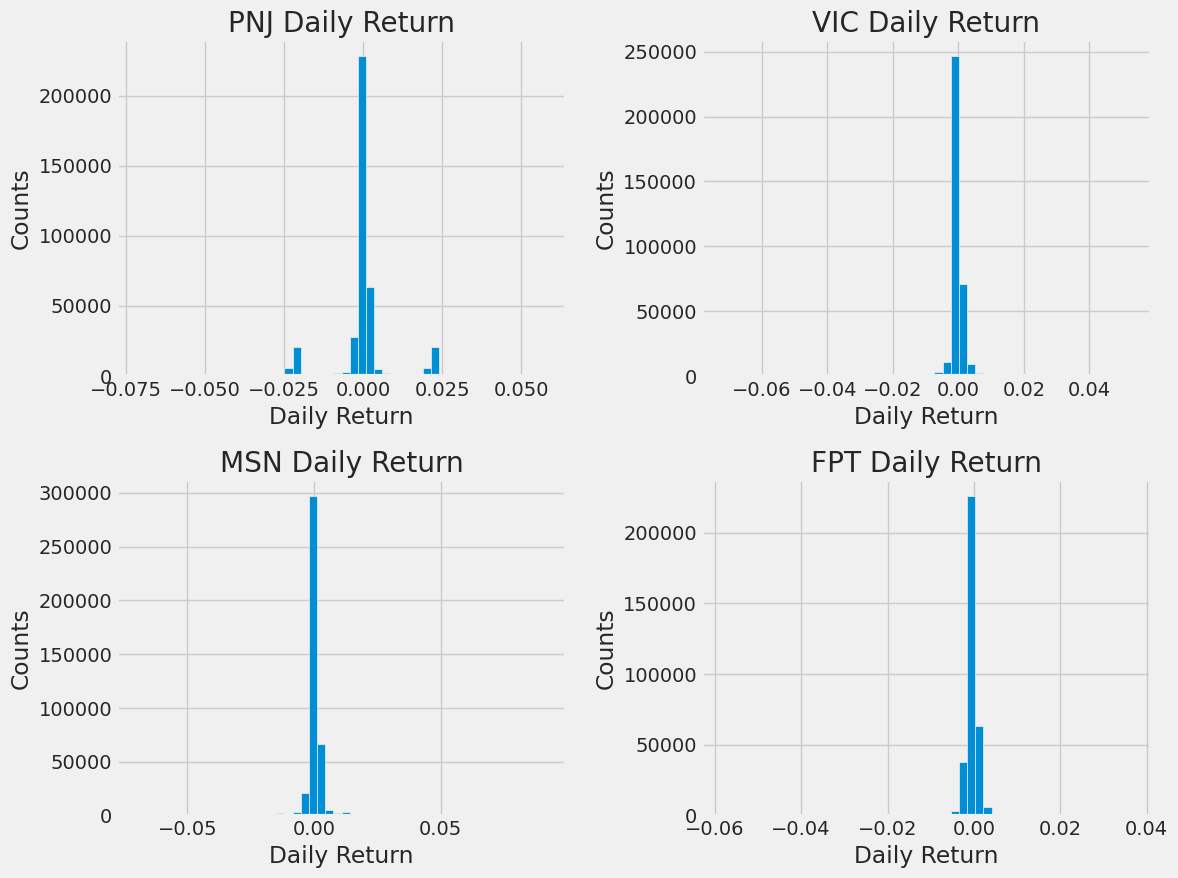

In [ ]:
plt.figure(figsize=(12, 9))

for i, ticker in enumerate(['PNJ', 'VIC', 'MSN', 'FPT'], 1):
    plt.subplot(2, 2, i)
    data[ticker + '_Daily_Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{ticker} Daily Return')

plt.tight_layout()
plt.show()


### Correlation Analysis
Chúng ta tính toán và hình dung mối tương quan giữa giá đóng cửa của các cổ phiếu khác nhau.

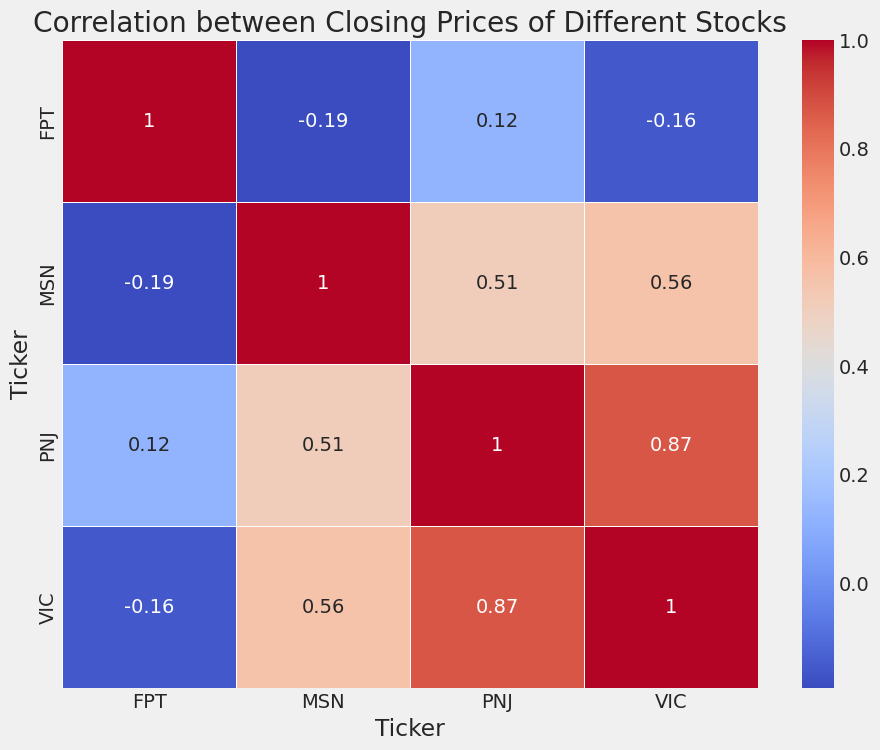

In [ ]:
# Calculate correlation between closing prices of different stocks
closing_prices = data.pivot(columns='Ticker', values='Close')
correlation_matrix = closing_prices.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Closing Prices of Different Stocks')
plt.show()


### Risk and Return Analysis
Chúng ta tính toán và vạch ra rủi ro cũng như lợi nhuận cho mỗi cổ phiếu.

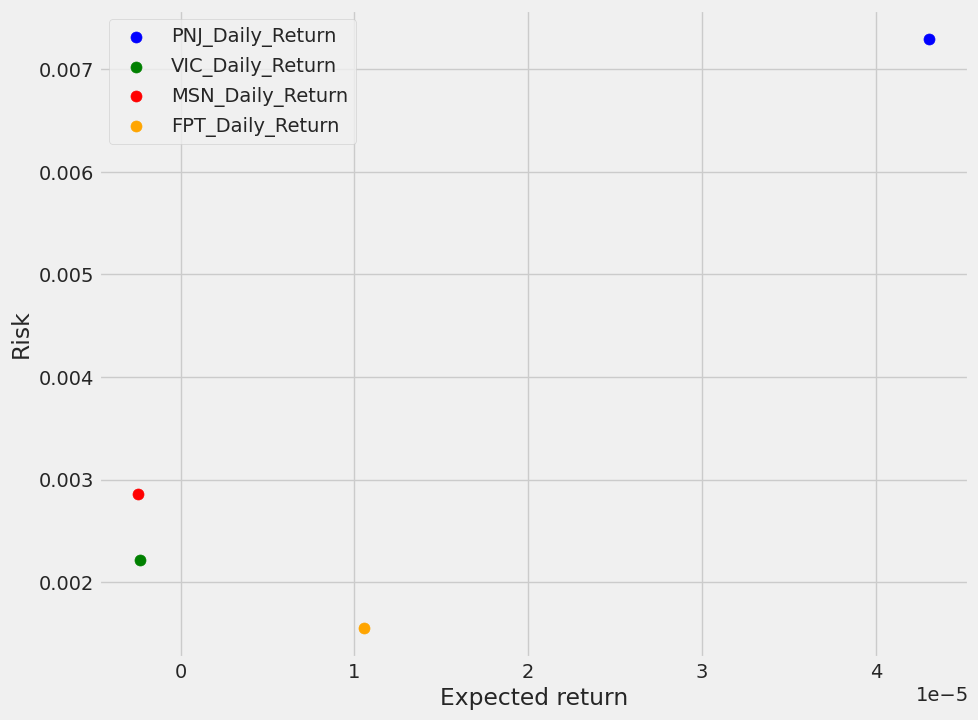

In [ ]:
# Calculate daily returns for each stock
rets = data[['PNJ_Daily_Return', 'VIC_Daily_Return', 'MSN_Daily_Return', 'FPT_Daily_Return']].dropna()

# Define marker area
area = np.pi * 20

# Define colors for each ticker
colors = ['blue', 'green', 'red', 'orange']

# Create scatter plot
plt.figure(figsize=(10, 8))
for i, ticker in enumerate(rets.columns):
    plt.scatter(rets.mean()[i], rets.std()[i], s=area, color=colors[i], label=ticker)

# Set labels for axes
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Add legend
plt.legend()
plt.show()


### Close Price History
Chúng ta vẽ lịch sử giá đóng cho mỗi mã.

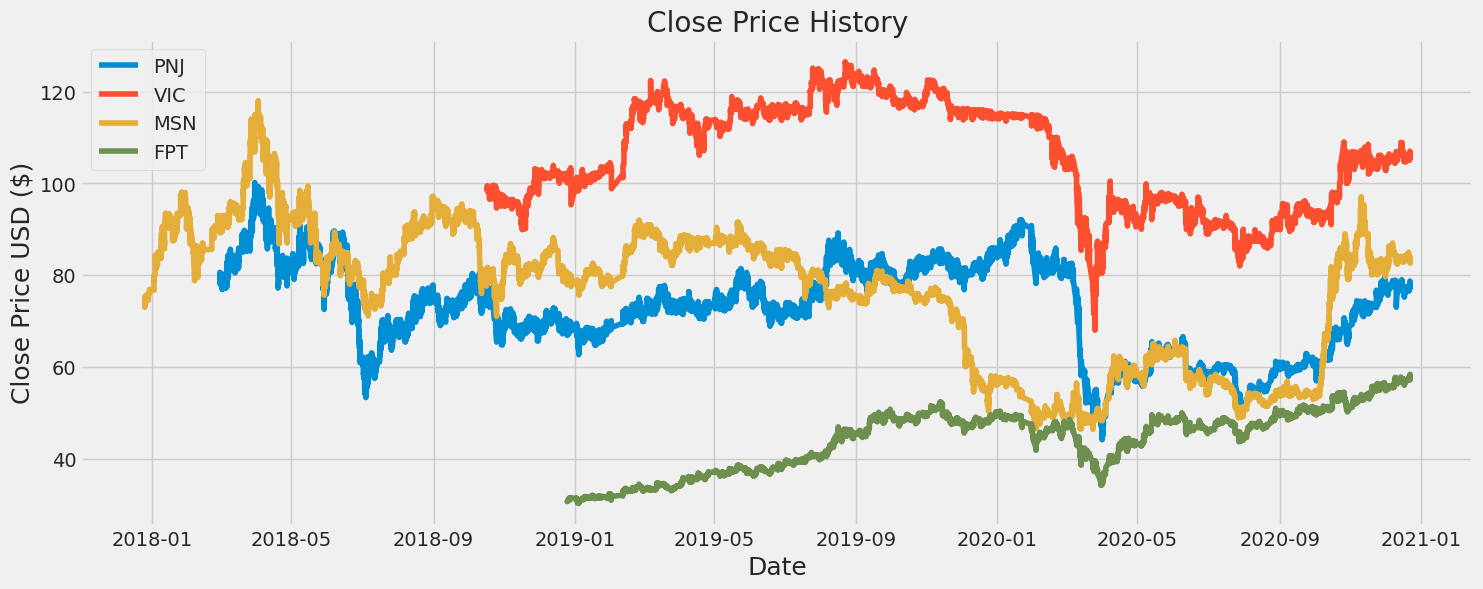

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')

# Plot close price history for each ticker
for ticker in ['PNJ', 'VIC', 'MSN', 'FPT']:
    plt.plot(data[data['Ticker'] == ticker]['Close'], label=ticker)

plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()


## Predictive Modeling
* Mã này sử dụng mô hình AutoRegressive Integrated Moving Average ARIMA để dự báo giá cổ phiếu cho các công ty khác nhau. Nó đặc biệt tập trung vào hai giai đoạn: trước và trong khi diễn ra dịch COVID, nhằm phân tích cách mô hình hoạt động trong các điều kiện thị trường khác nhau.

### Data Preparation
* Mã này trực quan hóa dữ liệu đào tạo và thử nghiệm trước COVID cho bốn mã chứng khoán: PNJ, VIC, MSN và FPT. Nó vẽ đồ thị giá đóng cửa theo thời gian, giúp phân tích xu hướng giá cổ phiếu lịch sử trước và trong đại dịch COVID-19.

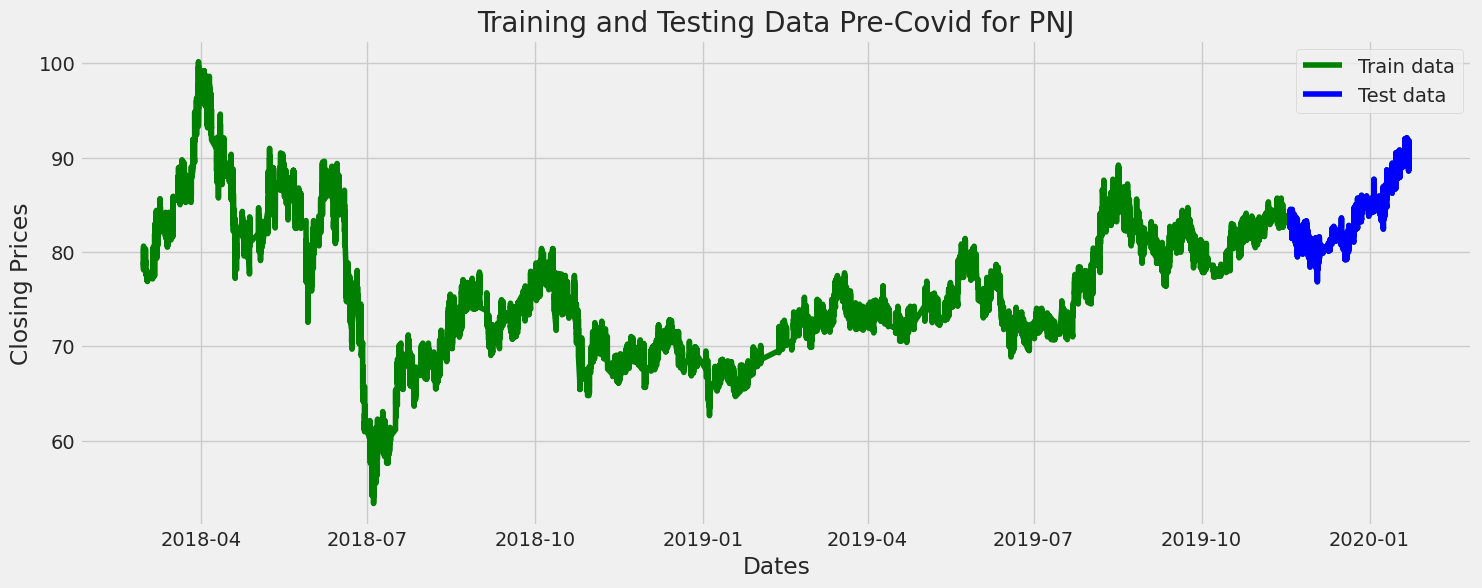

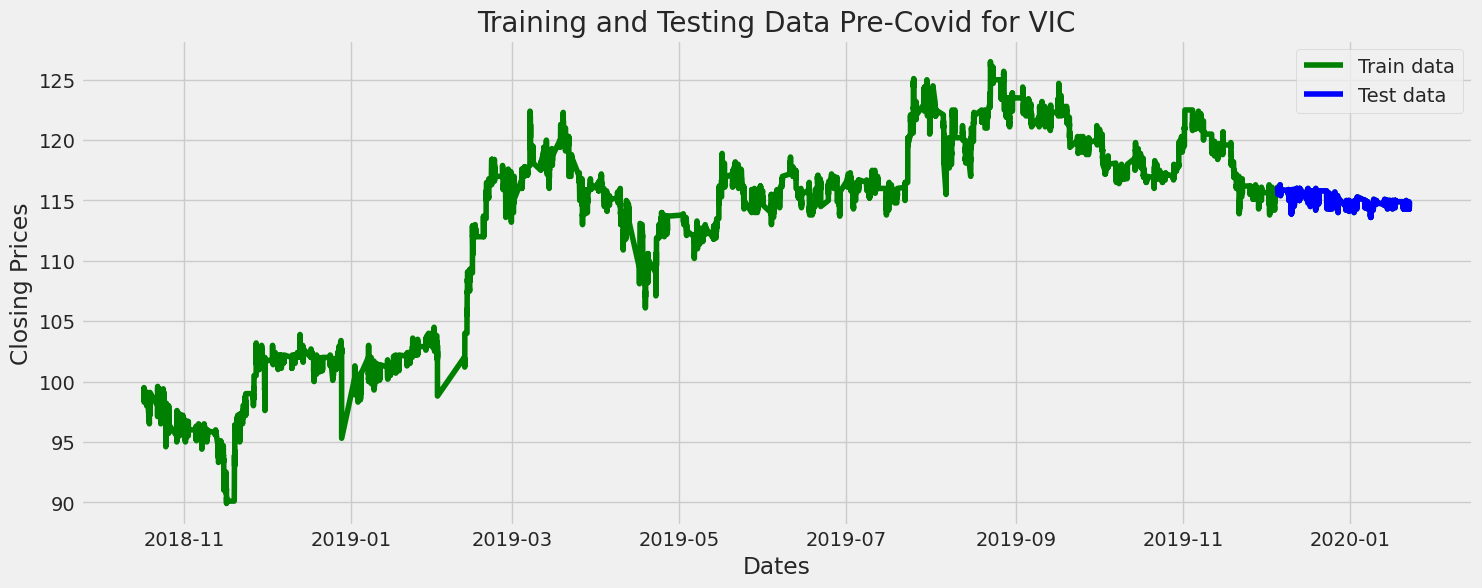

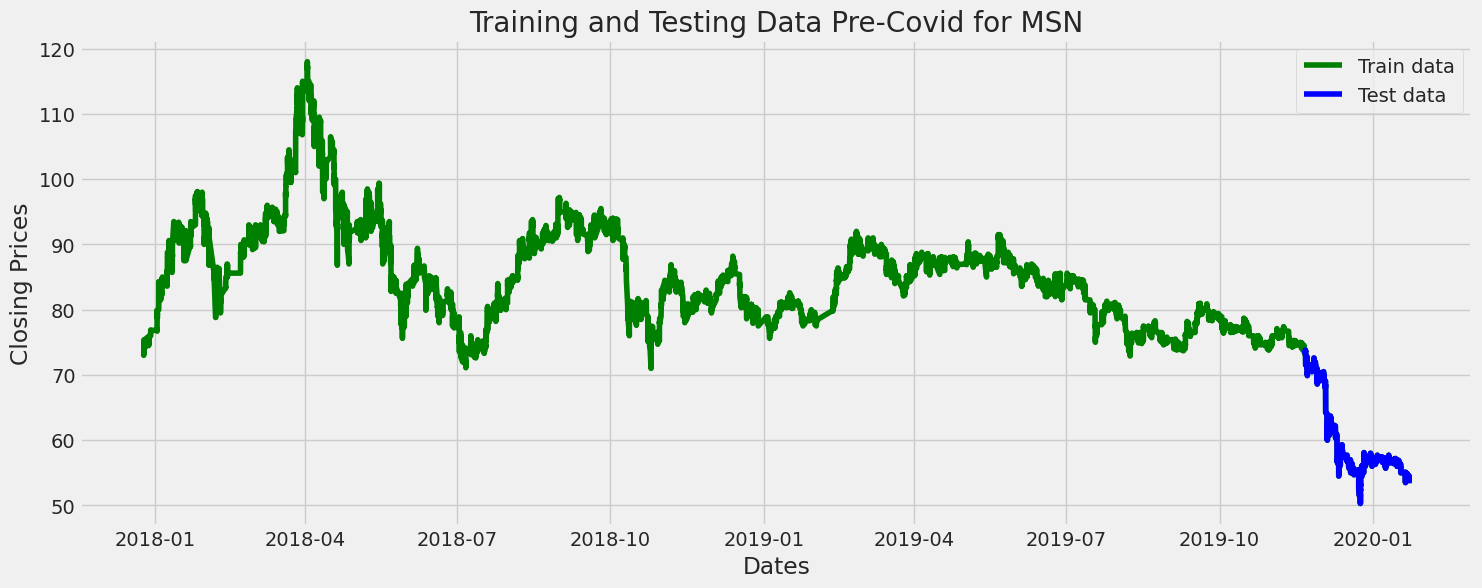

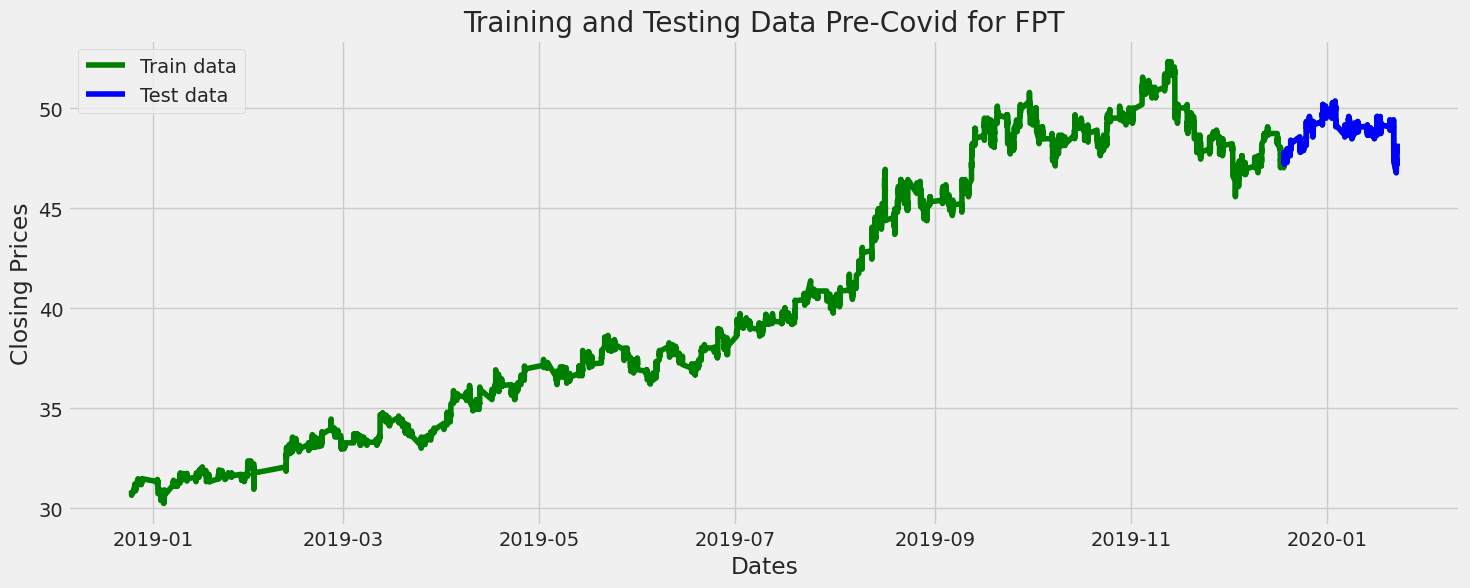

In [ ]:
# Define the tickers
tickers = ['PNJ', 'VIC', 'MSN', 'FPT']

# Plotting for each ticker
for ticker in tickers:
    # Extract the closing prices for the specific ticker
    pre_covid_data_ticker = pre_covid_data[pre_covid_data['Ticker'] == ticker]
    pre_covid_train_data = pre_covid_data_ticker['Close'].iloc[3:int(len(pre_covid_data_ticker)*0.9)]
    pre_covid_test_data = pre_covid_data_ticker['Close'].iloc[int(len(pre_covid_data_ticker)*0.9):]

    # Plot the training and testing data
    plt.figure(figsize=(16,6))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel('Closing Prices')
    plt.plot(pre_covid_data_ticker['Close'], 'green', label='Train data')
    plt.plot(pre_covid_test_data.index, pre_covid_test_data.values, 'blue', label='Test data')
    plt.title(f'Training and Testing Data Pre-Covid for {ticker}')
    plt.legend()
    plt.show()

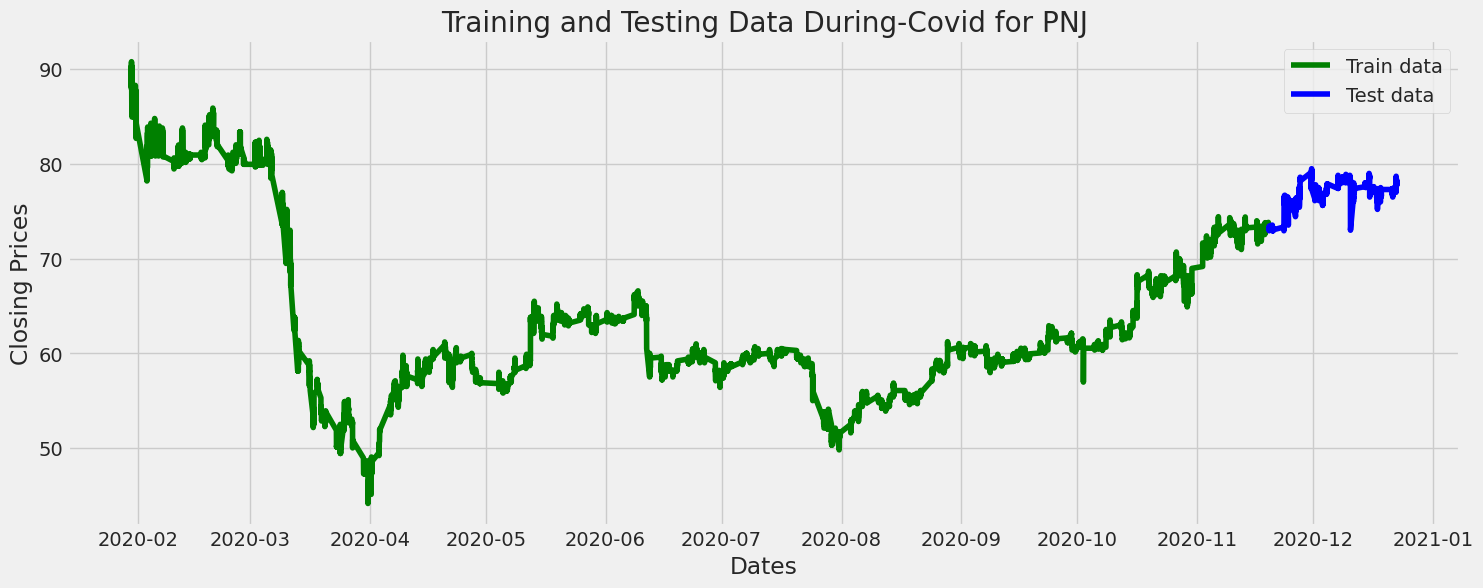

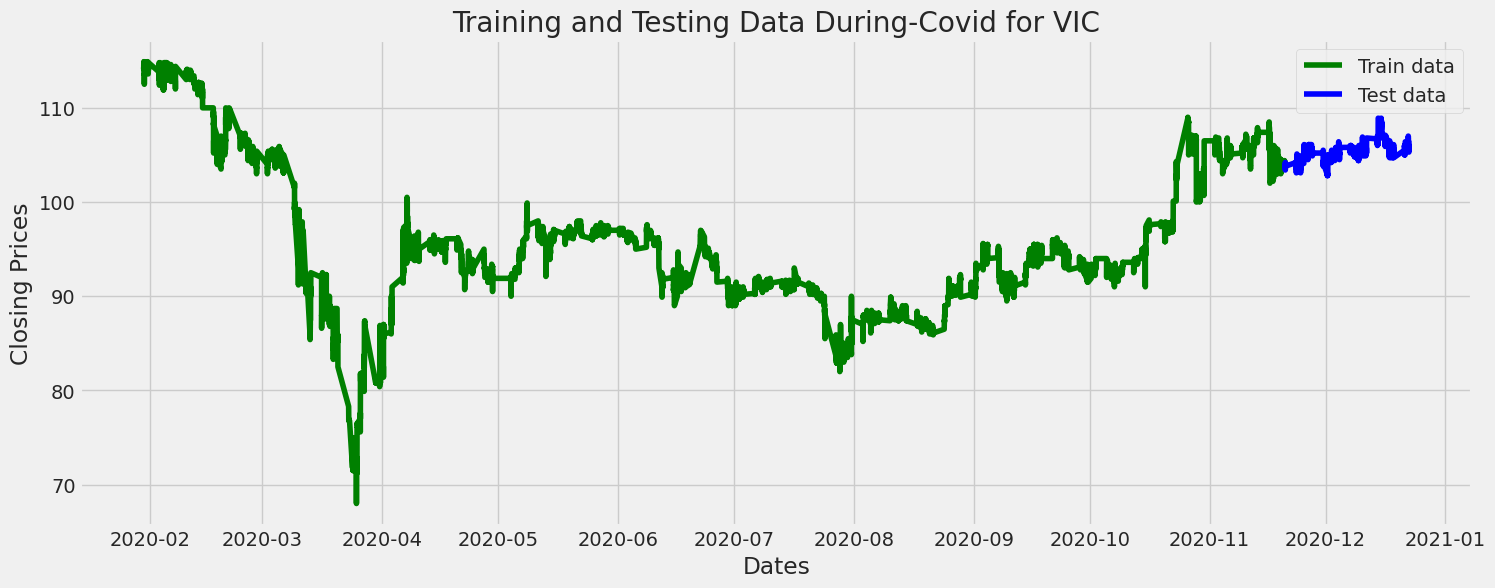

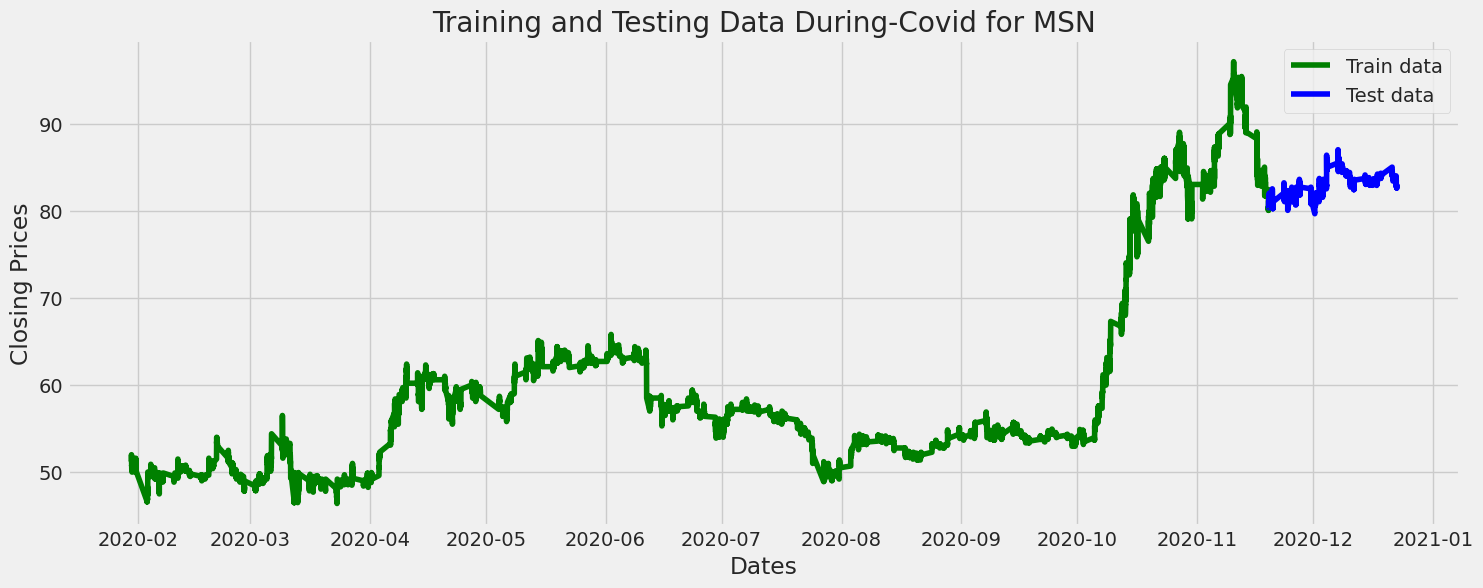

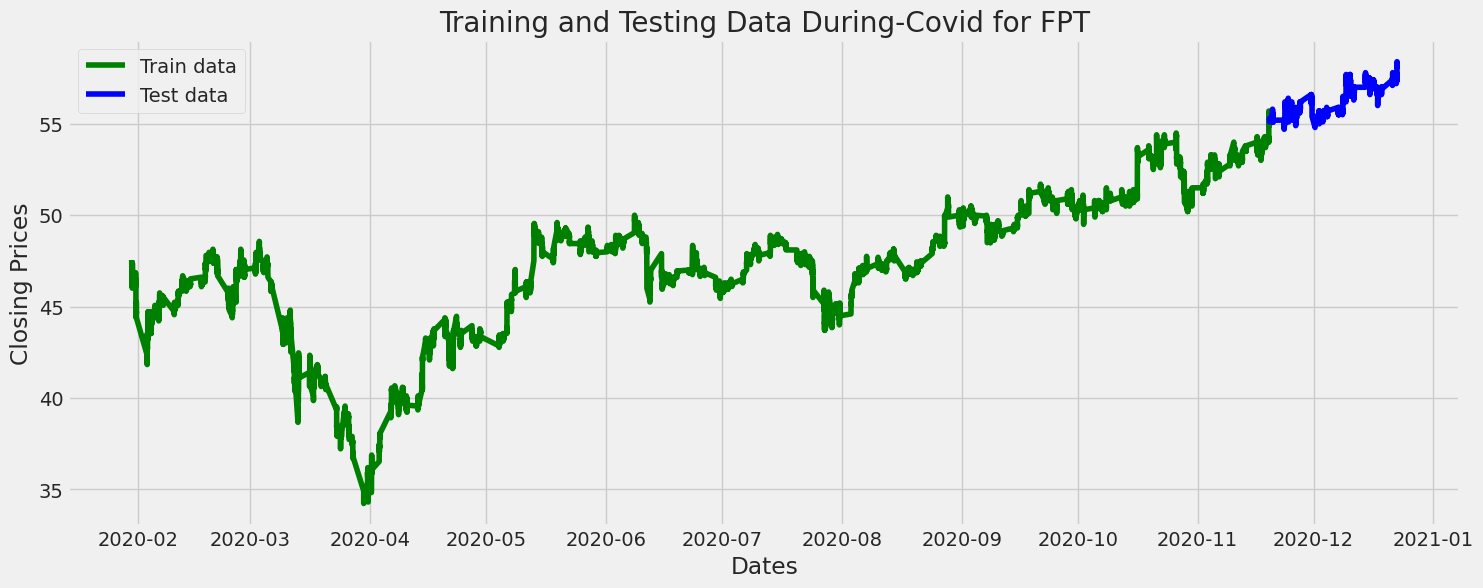

In [ ]:
# Plotting for each ticker during Covid
for ticker in tickers:
    # Extract the closing prices for the specific ticker
    during_covid_data_ticker = during_covid_data[during_covid_data['Ticker'] == ticker]
    during_covid_train_data = during_covid_data_ticker.iloc[3:int(len(during_covid_data_ticker)*0.9)]['Close']
    during_covid_test_data = during_covid_data_ticker.iloc[int(len(during_covid_data_ticker)*0.9):]['Close']

    # Plot the training and testing data
    plt.figure(figsize=(16,6))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel('Closing Prices')
    plt.plot(during_covid_train_data.index, during_covid_train_data.values, 'green', label='Train data')
    plt.plot(during_covid_test_data.index, during_covid_test_data.values, 'blue', label='Test data')
    plt.title(f'Training and Testing Data During-Covid for {ticker}')
    plt.legend()
    plt.show()

### ARIMA Forecasting and Evaluation
* Đoạn mã này đào tạo mô hình ARIMA để dự báo giá cổ phiếu cho 4 mã (PNJ, VIC, MSN, FPT) trước và trong giai đoạn Covid-19. Nó đánh giá độ chính xác của dự báo bằng cách sử dụng Lỗi bình phương trung bình (MSE), Lỗi bình phương trung bình gốc (RMSE) và Lỗi tuyệt đối trung bình (MAE).


Results for Pre-COVID period:

Ticker: PNJ
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=2563.325, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2570.578, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2564.237, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2565.392, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2568.666, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=2561.585, Time=0.56 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=2563.290, Time=1.01 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=3.19 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=2563.652, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=2562.476, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=2563.301, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=2563.257, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=2562.546, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=2561.733, Time=0.1

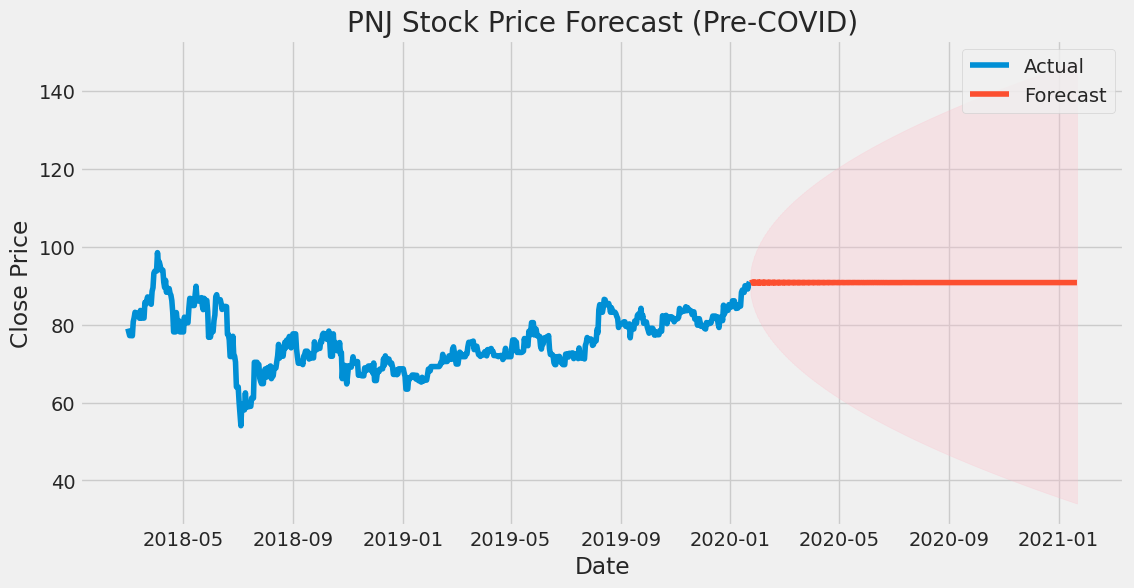


Ticker: VIC
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=1341.030, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1337.681, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1339.699, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1339.863, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1336.202, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=1339.601, Time=0.12 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=1339.611, Time=0.12 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=1341.368, Time=0.58 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1337.741, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1337.900, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=1339.100, Time=0.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 3.157 seconds
MSE: 23.73980821917806
RMSE: 4.872351405551334
MAE: 3.638630136986298


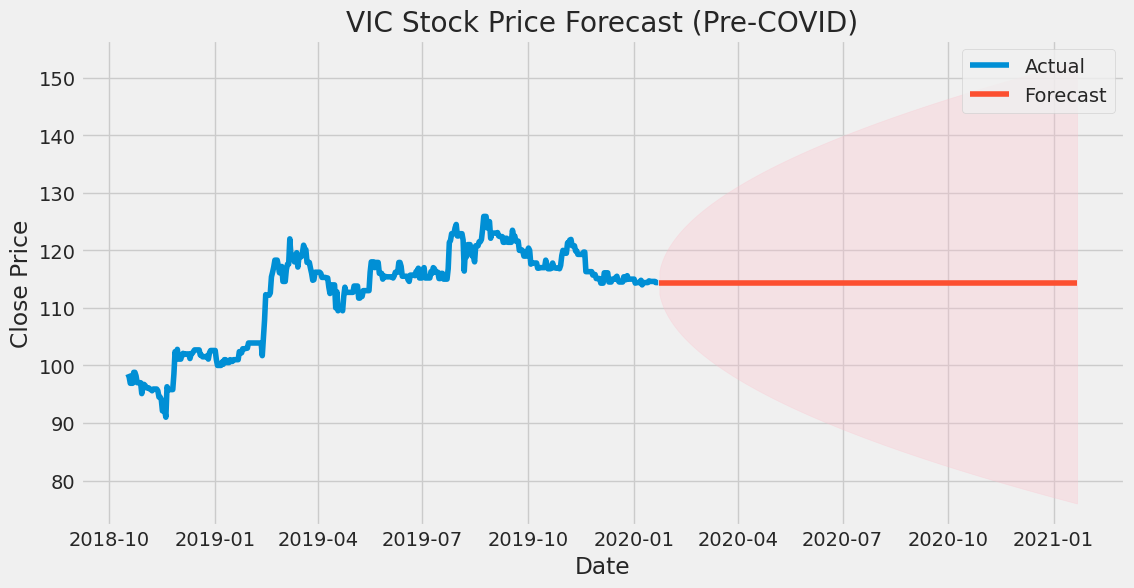


Ticker: MSN
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=2910.148, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2907.373, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2909.486, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2909.028, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2905.547, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=2907.543, Time=0.25 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=2907.072, Time=0.22 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=2907.455, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=2909.200, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=2909.180, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=2910.833, Time=0.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 3.513 seconds
MSE: 665.2315342465752
RMSE: 25.79208278225268
MAE: 23.882465753424654


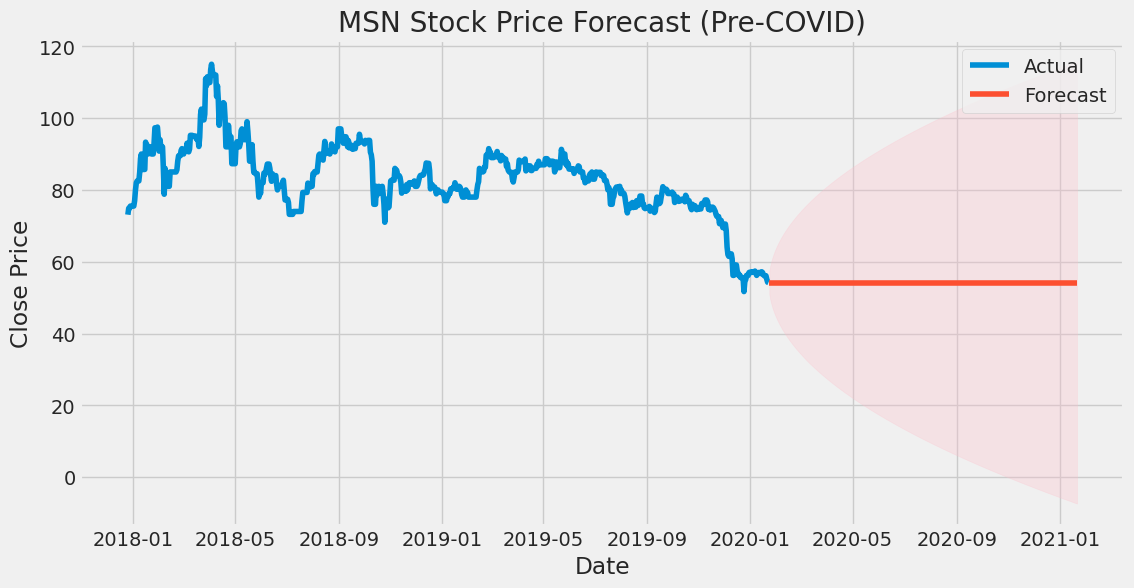


Ticker: FPT
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=526.608, Time=1.62 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=528.562, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=526.241, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=526.492, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=529.440, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=527.858, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=523.161, Time=0.45 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=525.091, Time=1.55 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=524.217, Time=1.43 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=523.717, Time=0.78 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=523.494, Time=1.16 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=526.113, Time=1.90 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=522.753, Time=0.56 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=525.800, Time=0.34 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept 

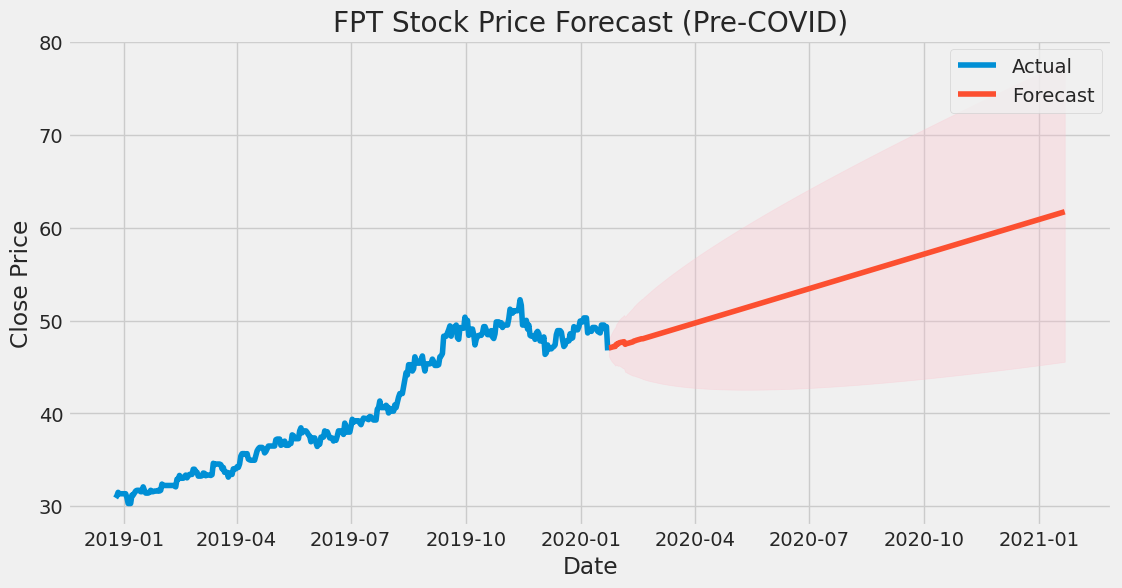


Results for During-COVID period:

Ticker: PNJ
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,1)[7]             : AIC=1227.873, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=1450.346, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=1365.454, Time=0.07 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=1226.537, Time=0.23 sec
 ARIMA(0,2,1)(0,0,0)[7]             : AIC=1224.678, Time=0.09 sec
 ARIMA(0,2,1)(1,0,0)[7]             : AIC=1226.526, Time=0.20 sec
 ARIMA(0,2,1)(1,0,1)[7]             : AIC=1228.389, Time=0.67 sec
 ARIMA(1,2,1)(0,0,0)[7]             : AIC=1226.016, Time=0.17 sec
 ARIMA(0,2,2)(0,0,0)[7]             : AIC=1225.930, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[7]             : AIC=1364.187, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[7]             : AIC=1224.424, Time=1.37 sec
 ARIMA(1,2,2)(1,0,0)[7]             : AIC=1226.424, Time=2.17 sec
 ARIMA(1,2,2)(0,0,1)[7]             : AIC=1226.424, Time=1.81 sec
 ARIMA(1,2,2)(1,0,1)[7]             : AIC=1228.361, 

In [ ]:
# Function to train ARIMA model and forecast
def arima_forecast(data, ticker, days_to_forecast):
    ticker_data = data[data['Ticker'] == ticker]
    ticker_data = ticker_data.asfreq('D').fillna(method='ffill')

    # Differencing to make the series stationary if necessary
    # You can use augmented Dickey-Fuller test to check if differencing is needed

    model = auto_arima(ticker_data['Close'], start_p=1, start_q=1,
                       max_p=5, max_q=5, seasonal=True, m=7, # Adjust seasonality parameters
                       start_P=0, seasonal_test='ocsb', # Seasonal differencing test
                       trace=True, error_action='ignore',
                       suppress_warnings=True)

    model_fit = model.fit(ticker_data['Close'])
    forecast, conf_int = model.predict(n_periods=days_to_forecast, return_conf_int=True)

    return forecast, conf_int, ticker_data['Close']

# Function to calculate accuracy metrics
def calculate_accuracy_metrics(true_values, forecast_values):
    mse = mean_squared_error(true_values, forecast_values)
    rmse = sqrt(mse)
    mae = mean_absolute_error(true_values, forecast_values)

    return mse, rmse, mae

# Forecasting and evaluating for each stock before and during Covid
forecast_horizon = 365  # Forecasting 365 days ahead
tickers = ['PNJ', 'VIC', 'MSN', 'FPT']

results = {}

for period, dataset in zip(['Pre-COVID', 'During-COVID'], [pre_covid_data, during_covid_data]):
    print(f"\nResults for {period} period:")
    results[period] = {}

    for ticker in tickers:
        print(f"\nTicker: {ticker}")

        forecast, conf_int, close_prices = arima_forecast(dataset, ticker, forecast_horizon)
        forecast_dates = pd.date_range(start=close_prices.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon)

        # Only evaluate the model if we have enough data
        if len(close_prices) >= forecast_horizon:
            true_values = close_prices[-forecast_horizon:].values
            mse, rmse, mae = calculate_accuracy_metrics(true_values, forecast[:forecast_horizon])

            results[period][ticker] = {
                'MSE': mse,
                'RMSE': rmse,
                'MAE': mae
            }

            print(f"MSE: {mse}")
            print(f"RMSE: {rmse}")
            print(f"MAE: {mae}")

            plt.figure(figsize=(12, 6))
            plt.plot(close_prices, label='Actual')
            plt.plot(forecast_dates, forecast, label='Forecast')
            plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
            plt.title(f'{ticker} Stock Price Forecast ({period})')
            plt.xlabel('Date')
            plt.ylabel('Close Price')
            plt.legend()
            plt.show()

### Results Summary

In [ ]:
# Summarizing results
print("\nSummary of Results:")
for period in results:
    print(f"\n{period}:")
    for ticker in results[period]:
        print(f"{ticker}:")
        print(f"  MSE: {results[period][ticker]['MSE']}")
        print(f"  RMSE: {results[period][ticker]['RMSE']}")
        print(f"  MAE: {results[period][ticker]['MAE']}")



Summary of Results:

Pre-COVID:
PNJ:
  MSE: 214.95158803569763
  RMSE: 14.661227371393489
  MAE: 13.606457444414408
VIC:
  MSE: 23.73980821917806
  RMSE: 4.872351405551334
  MAE: 3.638630136986298
MSN:
  MSE: 665.2315342465752
  RMSE: 25.79208278225268
  MAE: 23.882465753424654
FPT:
  MSE: 168.1501859139172
  RMSE: 12.967273649997411
  MAE: 12.702724858418659

During-COVID:


## Conclusion

### Pre-COVID Period

* PNJ: Giá cổ phiếu có xu hướng đi ngang trong giai đoạn trước Covid, với RMSE và MAE tương đối thấp cho thấy độ chính xác dự báo ở mức khá.
* VIC: Tương tự như PNJ, giá cổ phiếu VIC cũng có xu hướng đi ngang với độ sai số thấp cho thấy độ chính xác dự báo ở mức hợp lý.
* MSN: Giá cổ phiếu MSN cũng có xu hướng đi ngang nhưng có chỉ số sai số cao hơn so với PNJ và VIC, cho thấy độ chính xác dự báo thấp hơn một chút.
* FPT: Giá cổ phiếu FPT có xu hướng tăng trong giai đoạn trước Covid, mặc dù có chỉ số sai số tương đương với PNJ và VIC.

### During-COVID Period

* PNJ: Trong thời kỳ Covid, giá cổ phiếu PNJ có xu hướng tăng, với RMSE và MAE cao hơn đáng kể so với thời kỳ trước Covid, cho thấy độ chính xác dự báo thấp hơn.
* VIC: Giá cổ phiếu của VIC vẫn tương đối ổn định, duy trì xu hướng đi ngang trong thời kỳ COVID, với các chỉ số sai số tương đương với thời kỳ trước COVID.
* MSN: Tương tự như VIC, giá cổ phiếu của MSN cũng có xu hướng đi ngang trong * thời kỳ COVID, với các chỉ số sai số tương tự như thời kỳ trước COVID.
* FPT: Giá cổ phiếu FPT tiếp tục thể hiện xu hướng đi ngang trong thời kỳ Covid, với các chỉ số sai số phù hợp với thời kỳ trước Covid.